# Q1 Spending Prediction Problem

In [132]:
import pandas as pd

# Stage 1: Data Preprocessing

In [133]:
data = pd.read_csv('All Data-Table 1.csv')

In [134]:
data.head()

,sequence_number,US,source_a,source_c,source_b,source_d,source_e,source_m,source_o,source_h,...,source_x,source_w,Freq,last_update_days_ago,1st_update_days_ago,Web order,Gender=male,Address_is_res,Purchase,Spending
0,1,1,0,0,1,0,0,0,0,0,...,0,0,2,3662,3662,1,0,1,1,127.87
1,2,1,0,0,0,0,1,0,0,0,...,0,0,0,2900,2900,1,1,0,0,0.00
2,3,1,0,0,0,0,0,0,0,0,...,0,0,2,3883,3914,0,0,0,1,127.48
3,4,1,0,1,0,0,0,0,0,0,...,0,0,1,829,829,0,1,0,0,0.00
4,5,1,0,1,0,0,0,0,0,0,...,0,0,1,869,869,0,0,0,0,0.00


In [135]:
data.columns

Index(['sequence_number', 'US', 'source_a', 'source_c', 'source_b', 'source_d',
       'source_e', 'source_m', 'source_o', 'source_h', 'source_r', 'source_s',
       'source_t', 'source_u', 'source_p', 'source_x', 'source_w', 'Freq',
       'last_update_days_ago', '1st_update_days_ago', 'Web order',
       'Gender=male', 'Address_is_res', 'Purchase', 'Spending'],
      dtype='object')

In [136]:
data_restricted = data[data['Purchase'] == 1]

In [137]:
data_for_prediction = data.drop(['sequence_number','Purchase'], axis=1)

In [138]:
data_restricted_for_prediction = data_restricted.drop(['sequence_number','Purchase'], axis=1)

In [139]:
data_X = data_for_prediction.drop(['Spending'], axis=1)

In [140]:
data_Y = data_for_prediction['Spending']

In [142]:
data_X_restricted = data_restricted_for_prediction.drop(['Spending'], axis=1)

In [143]:
data_Y_restricted = data_restricted_for_prediction['Spending']

In [144]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_normalized = scaler.fit_transform(data_X)
X_normalized_restricted = scaler.fit_transform(data_X_restricted)

Data has been normalised as per the above and will be passed through the algorithms that we are trying to test out

In [145]:
from sklearn.linear_model import ElasticNet, LinearRegression
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split
import matplotlib.pyplot as plt

X_train, X_test, y_train, y_test = train_test_split(data_X, data_Y, test_size=0.2, random_state=42)

In [146]:
X_restricted_train, X_restricted_test, y_restricted_train, y_restricted_test = train_test_split(data_X_restricted, data_Y_restricted, test_size=0.2, random_state=42)

# Modelling and evaluating the performances separately through 

In [149]:
model = LinearRegression()

In [148]:
param_grid = {
    'fit_intercept': [True, False],
    'normalize': [True, False]
}

In [150]:
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Get the best parameters, including the regularization type and strength
best_params = grid_search.best_params_

In [156]:
best_params

{'fit_intercept': False, 'normalize': True}

In [151]:
best_model = LinearRegression(**best_params)
best_model.fit(X_train, y_train)

LinearRegression(fit_intercept=False, normalize=True)

In [152]:
cv_scores = cross_val_score(best_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
mse_scores = -cv_scores

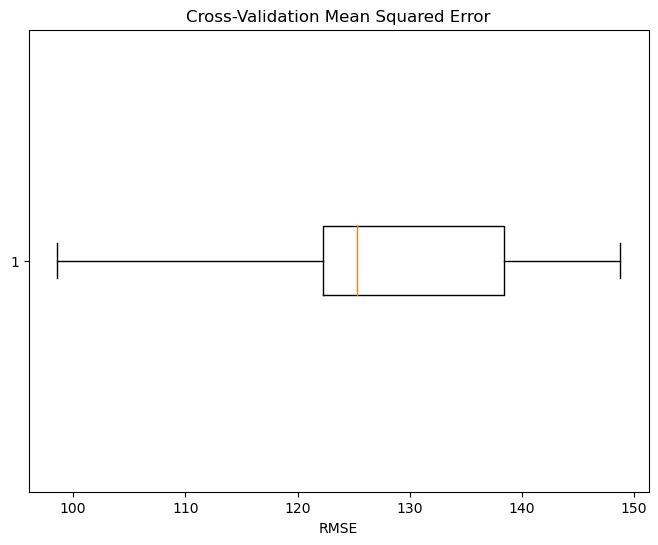

In [155]:
import numpy as np

plt.figure(figsize=(8, 6))
plt.boxplot(np.sqrt(mse_scores), vert=False)
plt.title('Cross-Validation Mean Squared Error')
plt.xlabel('RMSE')
plt.show()

Root Mean Squares for linear regression are varying from 100 and 150 with an majority are lying in between of 122 and 140

In [157]:
from sklearn.model_selection import cross_val_predict
y_pred = cross_val_predict(best_model, X_train, y_train, cv=5)

In [158]:
residuals = y_train - y_pred

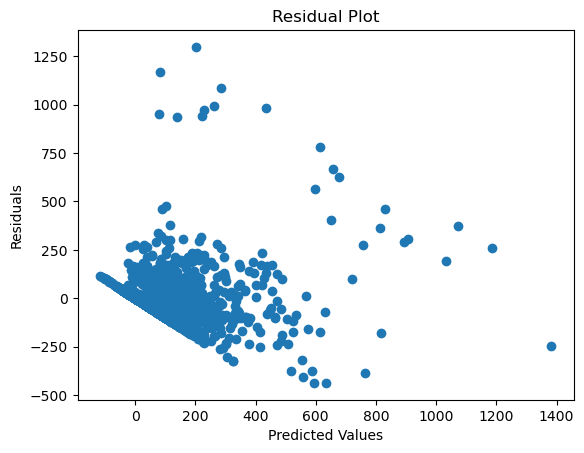

In [159]:
plt.scatter(y_pred, residuals)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

In [161]:
import numpy as np
from sklearn.metrics import mean_squared_error


mse_dt = mean_squared_error(y_train, y_pred)
print(f"Root Mean Squared Error: {np.sqrt(mse_dt)}")

Root Mean Squared Error: 127.79596784652018


After Cross validation the model with best hyper parameter is showing a mean of 127.79 RMSE

# Decision Tree

In [162]:
param_grid_dt = {
    'max_depth': [None, 10, 11, 12, 13, 20, 30, 40],  # You can add more hyperparameters
    'min_samples_split': [2, 3, 4, 5, 6, 7, 8,9, 10,11,12,13,14,15],
}


In [163]:
from sklearn.tree import DecisionTreeRegressor
model_dt = DecisionTreeRegressor()

In [164]:
grid_search = GridSearchCV(model_dt, param_grid_dt, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [None, 10, 11, 12, 13, 20, 30, 40],
                         'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                               12, 13, 14, 15]},
             scoring='neg_mean_squared_error')

In [165]:
best_params = grid_search.best_params_

In [166]:
best_params

{'max_depth': 11, 'min_samples_split': 9}

In [167]:
best_model = DecisionTreeRegressor(**best_params)

In [168]:
cv_scores = cross_val_score(best_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
mse_scores = -cv_scores

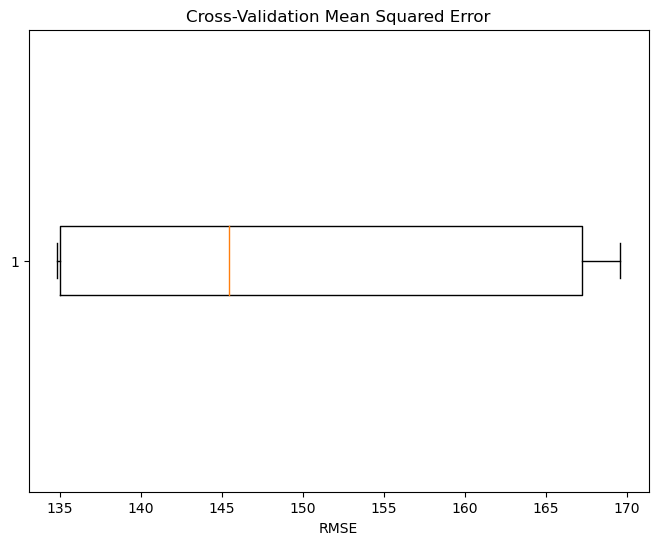

In [170]:
plt.figure(figsize=(8, 6))
plt.boxplot(np.sqrt(mse_scores), vert=False)
plt.title('Cross-Validation Mean Squared Error')
plt.xlabel('RMSE')
plt.show()

Root Mean Squares for decision tree are varying from 136 and 168.

In [171]:
# Use cross-validation to get predictions
predicted = cross_val_predict(best_model, X_train, y_train, cv=5)

# Calculate residuals
residuals = y_train - predicted

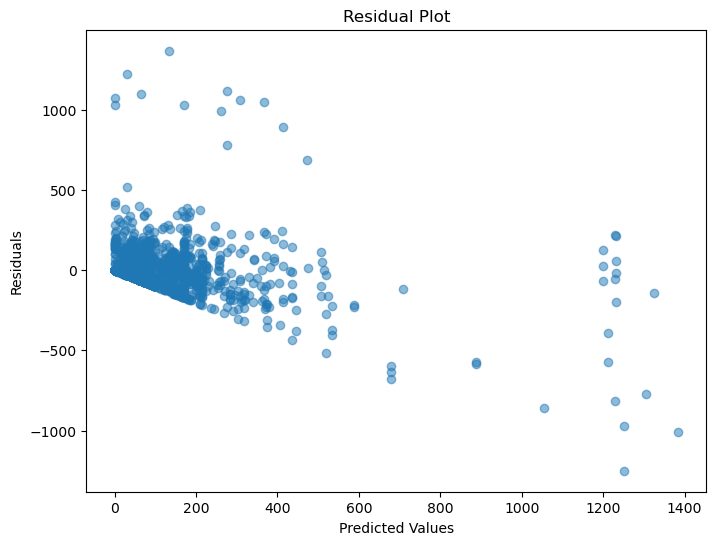

In [172]:
plt.figure(figsize=(8, 6))
plt.scatter(predicted, residuals, alpha=0.5)
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

In [173]:
mse_dt = mean_squared_error(y_train, predicted)
print(f"Root Mean Squared Error: {np.sqrt(mse_dt)}")

Root Mean Squared Error: 152.26391272170252


Best hyper paramters found through cross validation is showing a performance of 152.26

# KNN

In [175]:
param_grid_knn = {
    'n_neighbors': [1,2,3,4, 5,6,7,8,9,10],  # You can add more hyperparameters
    'weights': ['uniform', 'distance'],
}


In [176]:
from sklearn.neighbors import KNeighborsRegressor

model_knn = KNeighborsRegressor()


In [177]:
grid_search = GridSearchCV(model_knn, param_grid_knn, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'weights': ['uniform', 'distance']},
             scoring='neg_mean_squared_error')

In [178]:
best_params_knn = grid_search.best_params_

In [179]:
best_params_knn

{'n_neighbors': 10, 'weights': 'uniform'}

In [180]:
best_model_knn = KNeighborsRegressor(**best_params_knn)

In [181]:
predicted = cross_val_predict(best_model_knn, X_train, y_train, cv=5)

# Calculate residuals
residuals = y_train - predicted

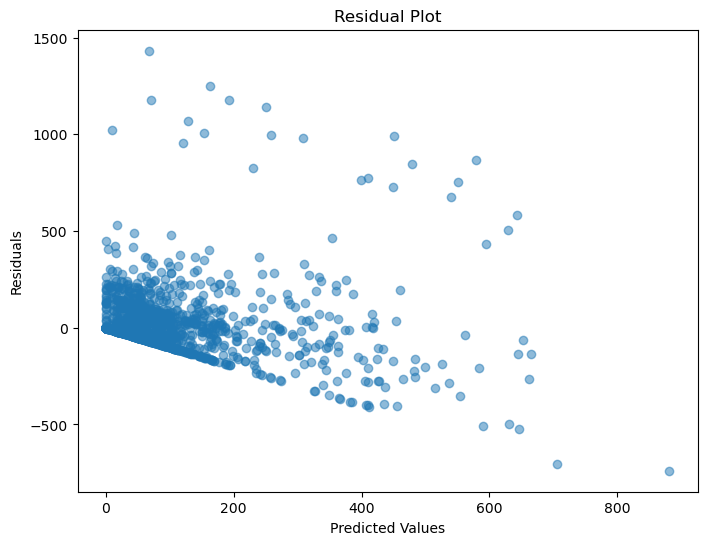

In [182]:
plt.figure(figsize=(8, 6))
plt.scatter(predicted, residuals, alpha=0.5)
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

In [183]:
cv_scores_knn = cross_val_score(best_model_knn, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
mse_scores = -cv_scores_knn

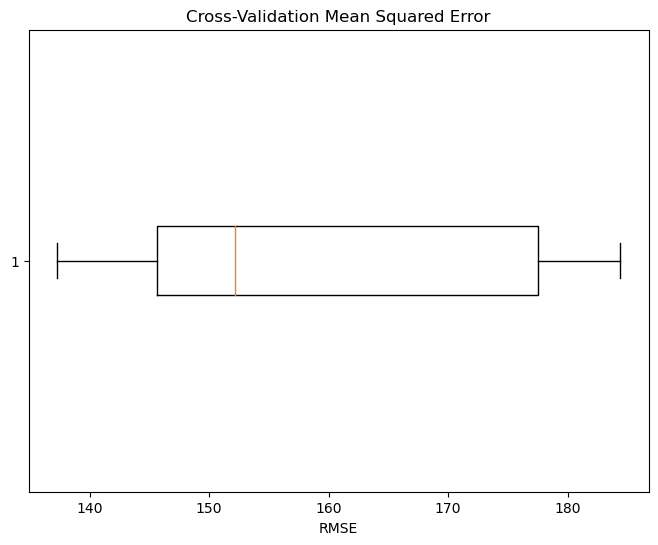

In [184]:
plt.figure(figsize=(8, 6))
plt.boxplot(np.sqrt(mse_scores), vert=False)
plt.title('Cross-Validation Mean Squared Error')
plt.xlabel('RMSE')
plt.show()

Root Mean Squares for knn are varying from 135 and 185 with an majority are lying in between of 145 and 185

In [185]:
mse_knn = mean_squared_error(y_train, predicted)
print(f"Root Mean Squared Error: {np.sqrt(mse_knn)}")

Root Mean Squared Error: 160.4543576505773


# Random Forest

In [186]:
param_grid_rf = {
    'n_estimators': [50, 100, 150, 200, 250],  # You can add more hyperparameters
    'max_depth': [None, 10, 20, 30,40],
}


In [187]:
from sklearn.ensemble import RandomForestRegressor

In [188]:
model_rf = RandomForestRegressor()

# Perform GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(model_rf, param_grid_rf, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(data_X, data_Y)


GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 10, 20, 30, 40],
                         'n_estimators': [50, 100, 150, 200, 250]},
             scoring='neg_mean_squared_error')

In [189]:
best_params_rf = grid_search.best_params_

# Train the best model with the chosen hyperparameters
best_model_rf = RandomForestRegressor(**best_params_rf)

In [190]:
grid_search.best_params_

{'max_depth': 10, 'n_estimators': 100}

In [191]:
predicted_rf = cross_val_predict(best_model_rf, data_X, data_Y, cv=5)

# Calculate residuals
residuals = data_Y - predicted_rf

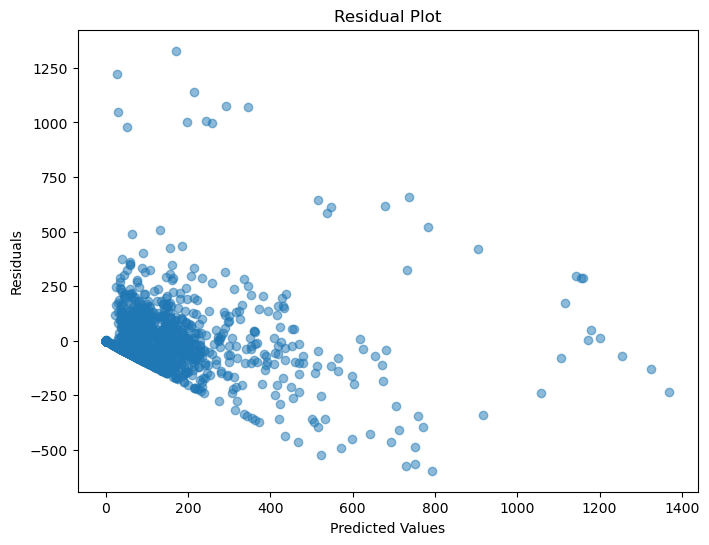

In [192]:
plt.figure(figsize=(8, 6))
plt.scatter(predicted_rf, residuals, alpha=0.5)
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

In [193]:
cv_scores_rf = cross_val_score(best_model_rf, data_X, data_Y, cv=5, scoring='neg_mean_squared_error')
mse_scores_rf = -cv_scores_rf

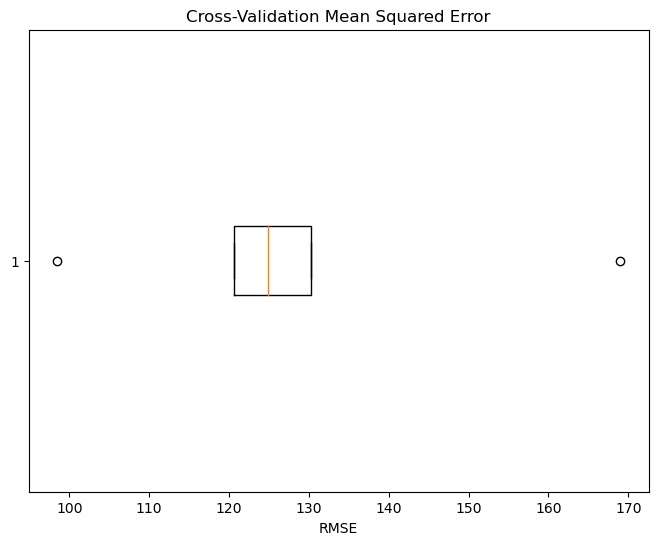

In [194]:
plt.figure(figsize=(8, 6))
plt.boxplot(np.sqrt(mse_scores_rf), vert=False)
plt.title('Cross-Validation Mean Squared Error')
plt.xlabel('RMSE')
plt.show()

Root Mean Squares for random regforestression are varying from 100 and 160 with an majority are lying in between of 120 and 130

In [195]:
mse_rf = mean_squared_error(data_Y, predicted_rf)
print(f"Root Mean Squared Error: {np.sqrt(mse_rf)}")

Root Mean Squared Error: 129.81905361404534


Average value of root mean squared error after cross validation is 129.819

# SVM

In [196]:
from sklearn.svm import SVR

In [197]:
from sklearn.preprocessing import StandardScaler

In [198]:
scaler = StandardScaler()
svr = SVR()
data_X_norm = scaler.fit_transform(data_X)

In [199]:
param_grid_svr = {
    'kernel': ['linear', 'rbf', 'poly'],
    'C': [0, 0.1, 1, 10],
    'epsilon': [0.1, 0.2, 0.3, 0.4, 0.5]
}

In [200]:
grid_search = GridSearchCV(estimator=svr, param_grid=param_grid_svr, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(data_X_norm, data_Y)
best_svr = grid_search.best_estimator_

In [202]:
grid_search.best_params_

{'C': 10, 'epsilon': 0.1, 'kernel': 'linear'}

In [203]:
predicted_svr = cross_val_predict(best_svr, data_X_norm, data_Y, cv=5)

# Calculate residuals
residuals_svr = data_Y - predicted_svr

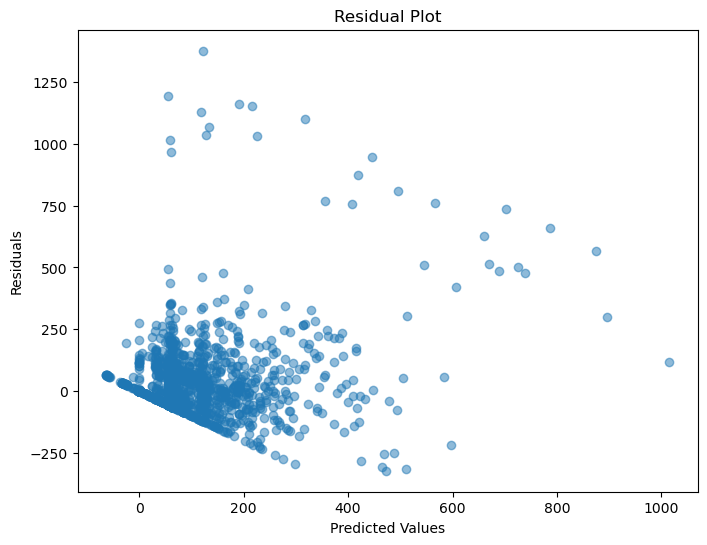

In [204]:
plt.figure(figsize=(8, 6))
plt.scatter(predicted_svr, residuals_svr, alpha=0.5)
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

In [205]:
cv_scores_svr = cross_val_score(best_svr, data_X_norm, data_Y, cv=5, scoring='neg_mean_squared_error')
mse_scores_svr = -cv_scores_svr

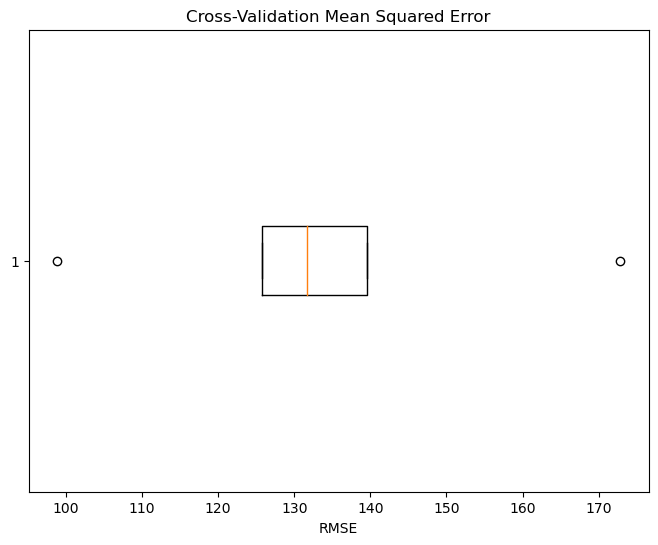

In [206]:
plt.figure(figsize=(8, 6))
plt.boxplot(np.sqrt(mse_scores_svr), vert=False)
plt.title('Cross-Validation Mean Squared Error')
plt.xlabel('RMSE')
plt.show()

Root Mean Squares for linear regression are varying from 100 and 170 with an majority are lying in between of 125 and 140

In [207]:
mse_svr = mean_squared_error(data_Y, predicted_svr)
print(f"Root Mean Squared Error: {np.sqrt(mse_svr)}")

Root Mean Squared Error: 135.83047591469574


cross validation results are showing the model is performing with an average rmse of 135.80

# XG Boost


In [208]:
param_grid_xgb = {
    'n_estimators': [50, 100, 150, 200, 250],  # You can add more hyperparameters
    'max_depth': [3, 4, 5,6,7,8,9,10],
    'learning_rate': [0.01, 0.02, 0.03, 0.04, 0.05, 0.1, 0.2, 0.3],
}


In [209]:
from xgboost import XGBRegressor

In [210]:
model_xgb = XGBRegressor()

# Perform GridSearchCV to find the best hyperparameters
grid_search_xgb = GridSearchCV(model_xgb, param_grid_xgb, cv=5, scoring='neg_mean_squared_error')
grid_search_xgb.fit(data_X, data_Y)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    gamma=None, gpu_id=None, grow_policy=None,
                                    importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_bin=None,
                                    max_cat...
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=None,
                                    reg_alpha=None, reg_lambda=None, ...),
             param_grid={'learning_rate': [0.01, 0.02, 0.03, 0.04, 0.05, 0.1,
                                           0.2, 0.3],
                         'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
                         'n_estimators': [50, 100, 150, 200, 250]},
             scoring='neg_mean_squared_error')

In [211]:
best_params_xgb = grid_search_xgb.best_params_
print(grid_search_xgb.best_params_)

# Train the best model with the chosen hyperparameters
best_model_xgb = XGBRegressor(**best_params_xgb)

# Use cross-validation to get predictions
predicted_xgb = cross_val_predict(best_model_xgb, data_X, data_Y, cv=5)

# Calculate residuals
residuals = data_Y - predicted_xgb

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}


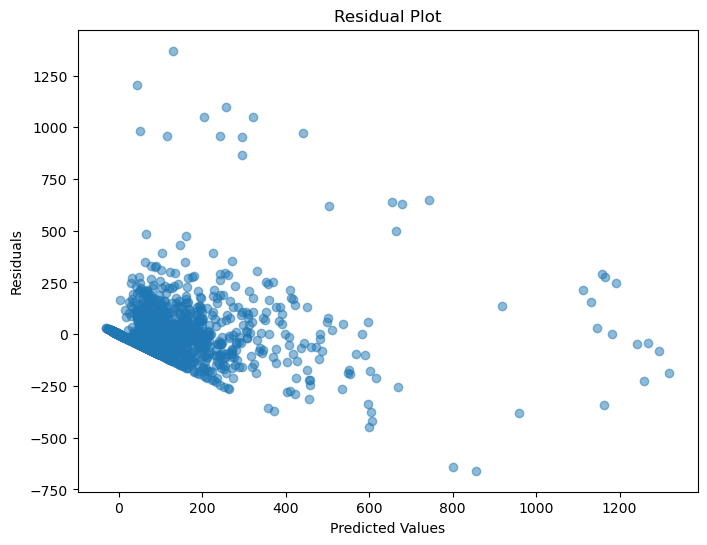

In [213]:
plt.figure(figsize=(8, 6))
plt.scatter(predicted_xgb, residuals, alpha=0.5)
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

In [214]:
cv_scores_xgb = cross_val_score(best_model_xgb, data_X, data_Y, cv=5, scoring='neg_mean_squared_error')
mse_scores_xgb = -cv_scores_xgb

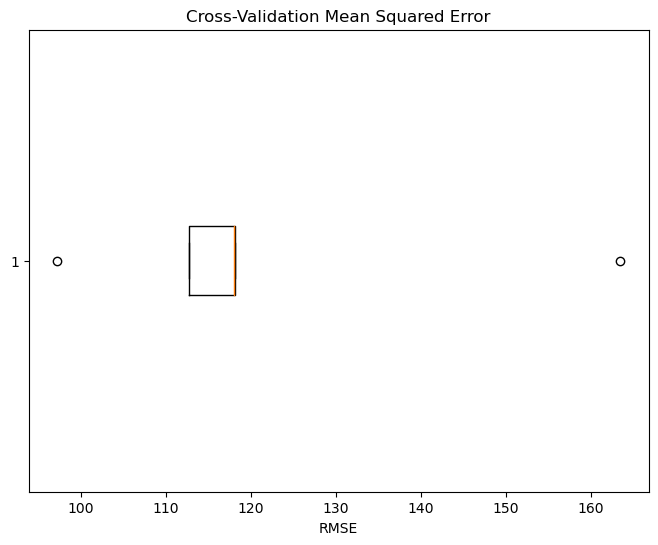

In [215]:
plt.figure(figsize=(8, 6))
plt.boxplot(np.sqrt(mse_scores_xgb), vert=False)
plt.title('Cross-Validation Mean Squared Error')
plt.xlabel('RMSE')
plt.show()

the majority of the errors are lying between 112 and 120

In [216]:
mse_xgb = mean_squared_error(data_Y, predicted_xgb)
print(f"Root Mean Squared Error: {np.sqrt(mse_xgb)}")

Root Mean Squared Error: 123.88338584403564


average root mean squre value after prediction is 123.88

# Adaptive Boost 

In [217]:
param_grid_ab = {
    'n_estimators': [50, 100, 150, 200, 250],  # You can add more hyperparameters
    'learning_rate': [0.01, 0.02, 0.05, 0.1, 0.2, 0.3],
}


In [218]:
from sklearn.ensemble import AdaBoostRegressor

In [219]:
model_ab = AdaBoostRegressor(base_estimator=None)  # You can specify a base estimator if needed

# Perform GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(model_ab, param_grid_ab, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(data_X, data_Y)

GridSearchCV(cv=5, estimator=AdaBoostRegressor(),
             param_grid={'learning_rate': [0.01, 0.02, 0.05, 0.1, 0.2, 0.3],
                         'n_estimators': [50, 100, 150, 200, 250]},
             scoring='neg_mean_squared_error')

In [220]:
best_params_ab = grid_search.best_params_

# Train the best model with the chosen hyperparameters
best_model_ab = AdaBoostRegressor(**best_params_ab, base_estimator=None)

In [221]:
grid_search.best_params_

{'learning_rate': 0.02, 'n_estimators': 100}

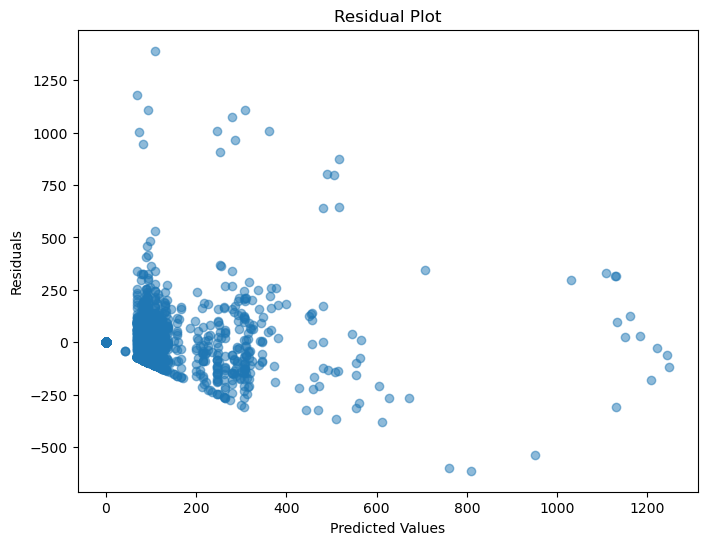

In [222]:
from sklearn.model_selection import cross_val_predict
predicted_ab = cross_val_predict(best_model_ab, data_X, data_Y, cv=5)

# Calculate residuals
residuals_ab = data_Y - predicted_ab

# Plot residuals
plt.figure(figsize=(8, 6))
plt.scatter(predicted_ab, residuals_ab, alpha=0.5)
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

In [223]:
cv_scores_ab = cross_val_score(best_model_ab, data_X, data_Y, cv=5, scoring='neg_mean_squared_error')
mse_scores_ab = -cv_scores_ab

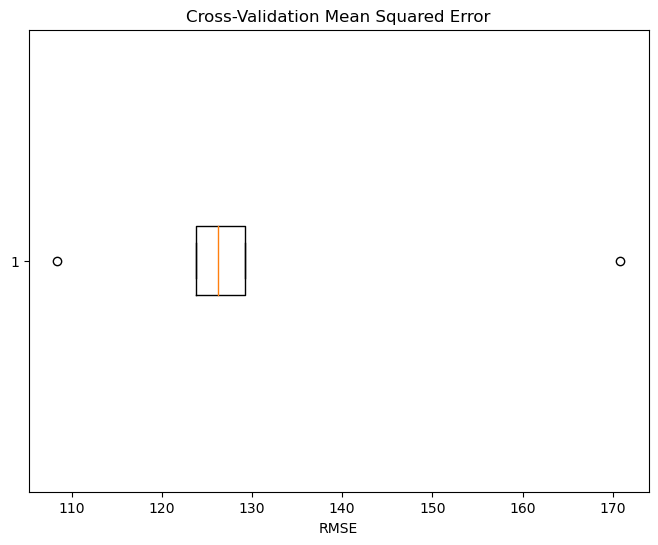

In [224]:
plt.figure(figsize=(8, 6))
plt.boxplot(np.sqrt(mse_scores_ab), vert=False)
plt.title('Cross-Validation Mean Squared Error')
plt.xlabel('RMSE')
plt.show()

Majority of the errors are lying in between 122 and 132

In [225]:
mse_ab = mean_squared_error(data_Y, predicted_ab)
print(f"Root Mean Squared Error: {np.sqrt(mse_ab)}")

Root Mean Squared Error: 133.51908608182876


best model performance with the best params for adaptive boost is showing a mean of 133.51 root mean square error after cross validation

# ANN

In [226]:
import tensorflow as tf

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)  # Output layer for regression
])


In [228]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [229]:
n_folds = 5
kf = KFold(n_splits=n_folds, shuffle=True, random_state=42)

In [234]:
rmse_scores = []

In [239]:
def rmse_scorer(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    return sqrt(mse)


In [245]:

for train_idx, valid_idx in kf.split(X_train, y_train):
    X_train_fold, y_train_fold = X_train.iloc[train_idx], y_train.iloc[train_idx]
    X_valid_fold, y_valid_fold = X_train.iloc[valid_idx], y_train.iloc[valid_idx]

    # Fit the model on the training data
    model.fit(X_train_fold, y_train_fold, epochs=50, batch_size=32, verbose=0)  # Adjust epochs and batch_size as needed

    # Make predictions on the test set
    y_pred = model.predict(X_valid_fold)

    # Calculate RMSE for this fold
    rmse = np.sqrt(mean_squared_error(y_valid_fold, y_pred))
    rmse_scores.append(rmse)


6/6 [==============================] - 0s 2ms/step


In [246]:
average_rmse = np.mean(rmse_scores)

print(f"Average RMSE across {n_folds} folds: {average_rmse}")

Average RMSE across 5 folds: 127.62428512246424


Neural Networks cross validation results are showing 127.62 mean square vale

# Out of sample prediction for NN

In [247]:
y_pred = model.predict(X_test)

7/7 [==============================] - 0s 2ms/step


In [248]:
residuals = y_test - y_pred.squeeze()

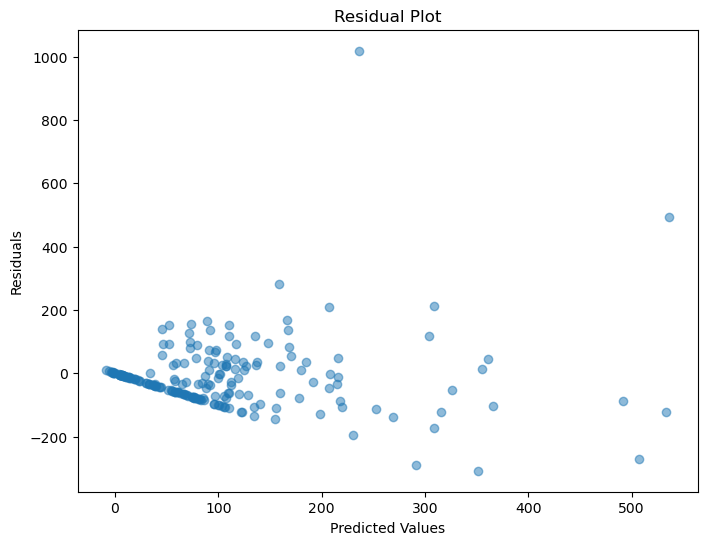

In [249]:
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

In [250]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)

In [251]:
print(f"Root Mean Squared Error: {np.sqrt(mse)}")

Root Mean Squared Error: 114.00383689457588


Out of sample predictions for Neural network is showing 114 rmse, however this is not very definitive value as it is not gone through the cross validation and have been tested against multiple folds. I just wanted to see how the neural networks are performing against a new unseen data hence tested this out. Cross validation results are showing slighlty lesser performances compared to the others

# ALL Models in Nested CV

All these while we were testing out all the models separately. Now to get the exact model comparison and model selection I'm going to perform the nested cv approach here. The models are passed with more hyper parameters and passed through nested cv to test out the actual performances

In [109]:
import warnings
warnings.filterwarnings('ignore')

In [110]:
warnings.filterwarnings('always', category=DeprecationWarning)

In [111]:
clf1 = LinearRegression()

In [112]:
clf2 = DecisionTreeRegressor()

In [113]:
clf3 = KNeighborsRegressor()

In [114]:
clf4 = RandomForestRegressor()

In [115]:
clf5 = AdaBoostRegressor(base_estimator=None)

In [116]:
clf6 = XGBRegressor()

In [117]:
clf7 = SVR()

In [252]:
from sklearn.pipeline import Pipeline
pipe1 = Pipeline([('std', StandardScaler()),
                  ('clf1', clf1)])

pipe2 = Pipeline([('std', StandardScaler()),
                  ('clf2', clf2)])
pipe3 = Pipeline([('std', StandardScaler()),
                  ('clf3', clf3)])
pipe4 = Pipeline([('std', StandardScaler()),
                  ('clf4', clf4)])
pipe5 = Pipeline([('std', StandardScaler()),
                  ('clf5', clf5)])
pipe6 = Pipeline([('std', StandardScaler()),
                  ('clf6', clf6)])
pipe7 = Pipeline([('std', StandardScaler()),
                  ('clf7', clf7)])

In [253]:
param_grid1 = [{
    'clf1__fit_intercept': [True, False],
    'clf1__normalize': [True, False]
}]

param_grid2 = [{
    'clf2__max_depth': [None, 1,2,3,4,5,6,7,8,9, 10, 11, 12, 13, 20, 30, 40],  
    'clf2__min_samples_split': [2, 3, 4, 5, 6, 7, 8,9, 10,11,12,13,14,15],
    'clf2__criterion': ['mse', 'friedman_mse']
}]

param_grid3 = [{
    'clf3__n_neighbors': [1,2,3,4, 5,6,7,8,9,10], 
    'clf3__weights': ['uniform', 'distance'],
    'clf3__p' : [1,2]
}
]

param_grid4 = [{
    'clf4__n_estimators': [10, 20, 30, 40, 50, 100, 150, 200, 250], 
    'clf4__max_depth': [None, 10, 20, 30,40],
    'clf4__min_samples_split': [2,3,4,5,10]
}
]

param_grid5 = [{
    'clf5__n_estimators': [50, 100, 150, 200, 250],  
    'clf5__learning_rate': [0.01, 0.02, 0.05, 0.1, 0.2, 0.3],
}]

param_grid6 = [{
    'clf6__n_estimators': [50, 100, 150, 200, 250], 
    'clf6__max_depth': [3, 4, 5,6,7,8,9,10],
    'clf6__learning_rate': [0.01, 0.02, 0.03, 0.04, 0.05, 0.1, 0.2, 0.3],
}]

param_grid7 = [{
    'clf7__kernel': ['linear', 'rbf', 'poly'],
    'clf7__C': [0, 0.1, 1, 10],
    'clf7__epsilon': [0.1, 0.2, 0.3, 0.4, 0.5]
}]

In [255]:
from sklearn.model_selection import StratifiedKFold, KFold

gridcvs = {}
inner_cv = KFold(n_splits=5, shuffle=True, random_state=1)

In [256]:
from sklearn.metrics import make_scorer

for pgrid, est, name in zip((param_grid1, param_grid2,
                             param_grid3, param_grid4, param_grid5, param_grid6, param_grid7),
                            (pipe1, pipe2, pipe3, pipe4, pipe5, pipe6, pipe7),
                            ('Lreg', 'DTree', 'KNN', 'RForest', 'AdaBoost', 'XGB', 'SVR')):
   
    gcv = GridSearchCV(estimator=est,
                       param_grid=pgrid,
                       scoring=make_scorer(mean_squared_error),
                       cv=inner_cv, verbose=0, n_jobs=-1, refit=True)
 
    gridcvs[name] = gcv

In [ ]:
for name, gs_est in sorted(gridcvs.items()):
    print(40 * '-', '\n')
    print('Algorithm:', name)
    print(' Inner loop:')
    
    outer_scores = []
    outer_cv = KFold(n_splits=5, shuffle=True, random_state=1)
    for train_idx, valid_idx in outer_cv.split(X_train, y_train):
        X_train_fold, y_train_fold = X_train.iloc[train_idx], y_train.iloc[train_idx]
        X_valid_fold, y_valid_fold = X_train.iloc[valid_idx], y_train.iloc[valid_idx]
        
        gridcvs[name].fit(X_train_fold, y_train_fold)
        print('\n Best Mean Squared Error (avg. of inner test folds): %.2f' % (gridcvs[name].best_score_))
        print(' Best parameters:', gridcvs[name].best_params_)
        
        # Calculate Mean Squared Error on the validation set
        y_pred = gridcvs[name].best_estimator_.predict(X_valid_fold)
        mse = mean_squared_error(y_valid_fold, y_pred)
        outer_scores.append(mse)
    print('\n Outer loop')
    mean_mse = np.mean(outer_scores)
    std_mse = np.std(outer_scores)
    print(f'Root Mean Squared Error:{np.sqrt(mean_mse)}')
    print(f'Mean Squared std error:{std_mse}')

In [ ]:
model_knn = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)  # Output layer for regression
])

In [262]:
model_knn.compile(optimizer='adam', loss='mean_squared_error')

In [263]:
param_grid8 = [{
        'optimizer': ['adam', 'sgd'],
        'activation': ['relu', 'tanh'],
        'hidden_units': [100, 50, 25]
}]

In [264]:
outer_cv = KFold(n_splits=5, shuffle=True, random_state=42)
inner_cv = KFold(n_splits=5, shuffle=True, random_state=42)

In [265]:
rmse_scorer = make_scorer(mean_squared_error, greater_is_better=False)

In [266]:
best_model = None
best_rmse = float('inf')

In [272]:
param_grid_lr = [{
    'fit_intercept': [True, False],
    'normalize': [True, False]
}]

param_grid_dt = [{
    'max_depth': [None, 1,2,3,4,5,6,7,8,9, 10, 11, 12, 13, 20, 30, 40],  
    'min_samples_split': [2, 3, 4, 5, 6, 7, 8,9, 10,11,12,13,14,15],
    'criterion': ['mse', 'friedman_mse']
}]

param_grid_knn = [{
    'n_neighbors': [1,2,3,4, 5,6,7,8,9,10], 
    'weights': ['uniform', 'distance'],
    'p' : [1,2]
}
]

param_grid_rf = [{
    'n_estimators': [10, 20, 30, 40, 50, 100, 150, 200, 250], 
    'max_depth': [None, 10, 20, 30,40],
    'min_samples_split': [2,3,4,5,10]
}
]

param_grid_ab = [{
    'n_estimators': [50, 100, 150, 200, 250],  
    'learning_rate': [0.01, 0.02, 0.05, 0.1, 0.2, 0.3],
}]

param_grid_xgb = [{
    'n_estimators': [100, 150, 200], 
    'max_depth': [3, 4, 5,6,7],
    'learning_rate': [0.1, 0.2, 0.3],
}]

param_grid_svr = [{
    'kernel': ['linear', 'rbf', 'poly'],
    'C': [0, 0.1, 1, 10],
    'epsilon': [0.1, 0.2, 0.3, 0.4, 0.5]
}]

In [275]:
model_performance_normalized = {}

In [273]:
final_models = {
    'Linear Regression' : (clf1, param_grid_lr),
    'Decision Tree': (clf2, param_grid_dt),
    'KNN': (clf3, param_grid_knn),
    'Random Forest': (clf4, param_grid_rf),
    'Adaptive Boost': (clf5, param_grid_ab),
    'XGB': (clf6, param_grid_xgb),
    'SVR': (clf7, param_grid_svr)
}

# Trainining and Modelling with normalized data as  input

In [ ]:
from sklearn.model_selection import RandomizedSearchCV



for model_name, (model, param_grid) in final_models.items():

    grid_search = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=10, cv=inner_cv, scoring=rmse_scorer)
    grid_search.fit(X_normalized, data_Y)
    rmse_scores = cross_val_score(grid_search, X_normalized, data_Y, cv=outer_cv, scoring=rmse_scorer)
    
    
    mean_rmse = np.sqrt(abs(rmse_scores.mean()) ) # Take absolute RMSE
    print('----------')
    print(rmse_scores)
    print('model for hyper paramerter tuning', model_name)
    print('RMSE is', mean_rmse)
    model_performance_normalized[model_name] = mean_rmse
    
    if mean_rmse < best_rmse:
        best_rmse = mean_rmse
        best_model = model_name
        best_params = grid_search.best_params_

print(f'Best model: {best_model} with RMSE of {best_rmse:.2f}')
print(f'Best hyperparameters: {best_params}')

Model Results
----------
[-16721.25156482 -13723.41893511 -14843.75352855 -16459.22785677
 -20187.50185071]
 
model for hyper paramerter tuning Linear Regression

RMSE is 128.0118383087892
----------
[-20338.13964669 -18998.54157411 -13995.5010129  -16633.71315191
 -24901.63236245]
 
model for hyper paramerter tuning Decision Tree

# RMSE is 137.74434852149415

----------
[-25047.35908173 -16352.55188021 -19310.09242904 -20770.0107388
 -25285.38888969]
 
model for hyper paramerter tuning KNN

# RMSE is 146.12693319129588

----------
[-18201.94038853 -14090.4980083  -13288.95139569 -14692.44709339
 -22412.06607812]
 
model for hyper paramerter tuning Random Forest

RMSE is 128.5969696097255
----------
[-18070.22002364 -14356.62484393 -15911.81491959 -15914.55515923
 -24690.2663605 ]
 
model for hyper paramerter tuning Adaptive Boost

RMSE is 133.3742713621256
----------
[-18118.49849043 -14328.45800454 -12876.79164139 -14991.40831554
 -21889.67070001]
 
model for hyper paramerter tuning XGB

RMSE is 128.22232812728856
----------
[-20198.58062018 -13729.87655254 -17188.7605327  -16846.92980633
 -23333.24299713]
 
model for hyper paramerter tuning SVR

# RMSE is 135.12763633608665

# Best model: Linear Regression with RMSE of 128.01

# Best hyperparameters: {'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': True, 'positive': False}

# Training and Evaluating the Models with non normalized data as input

In [ ]:
model_performance_non_normalized = {}

In [ ]:
from sklearn.model_selection import RandomizedSearchCV



for model_name, (model, param_grid) in final_models.items():

    grid_search = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=10, cv=inner_cv, scoring=rmse_scorer)
    grid_search.fit(data_X, data_Y)
    rmse_scores = cross_val_score(grid_search, data_X, data_Y, cv=outer_cv, scoring=rmse_scorer)
    
    
    mean_rmse = np.sqrt(abs(rmse_scores.mean()) ) # Take absolute RMSE
    print('----------')
    print(rmse_scores)
    print('model for hyper paramerter tuning', model_name)
    print('RMSE is', mean_rmse)
    print(grid_search.best_params_)
    model_performance_non_normalized[model_name] = mean_rmse
    
    if mean_rmse < best_rmse:
        best_rmse = mean_rmse
        best_model = model_name
        best_params = grid_search.best_params_

print(f'Best model: {best_model} with RMSE of {best_rmse:.2f}')
print(f'Best hyperparameters: {best_params}')

Model Results
----------

[-16729.97728653 -13730.14273313 -14843.75352855 -16448.19965509
 -20187.50185071]
 
model for hyper paramerter tuning Linear Regression

RMSE is 128.015292097478

----------
[-19685.53248669 -16859.09870169 -18427.06612427 -16622.04237346
 -23170.81225476]
 
model for hyper paramerter tuning Decision Tree

RMSE is 137.66956957938729

----------
[-27613.18755125 -18952.78019519 -26179.31505087 -24877.67870076
 -33141.89482259]
 
model for hyper paramerter tuning KNN

RMSE is 161.7188030630082

----------
[-17258.07655674 -13496.01022102 -12743.28692823 -14997.29640853
 -23245.16540321]
 
model for hyper paramerter tuning Random Forest

RMSE is 127.85916902414536

----------
[-18286.01900029 -14511.34978822 -15252.92607192 -16254.26663349
 -23754.77374411]
 
model for hyper paramerter tuning Adaptive Boost

RMSE is 132.7097096960416

----------
[-17212.20973841 -15502.04678336 -12527.62312638 -17556.91086534
 -21728.9470811 ]
 
model for hyper paramerter tuning XGB

RMSE is 126.02133486053694

----------

[-20198.58062018 -13729.87655254 -17188.7605327 -16846.92980633 -23333.24299713]

model for hyper paramerter tuning SVR

RMSE is 135.12763633608665

-------------

Best model: XGB with RMSE of 126.02133486053694

Best hyperparameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}

In [9]:
import pandas as pd
before_df = pd.DataFrame(list(model_performance_non_normalized.items()), columns=['Model_Name', 'Before_normalisation'])
after_df = pd.DataFrame(list(model_performance_normalized.items()), columns=['Model_Name', 'After_normalisation'])

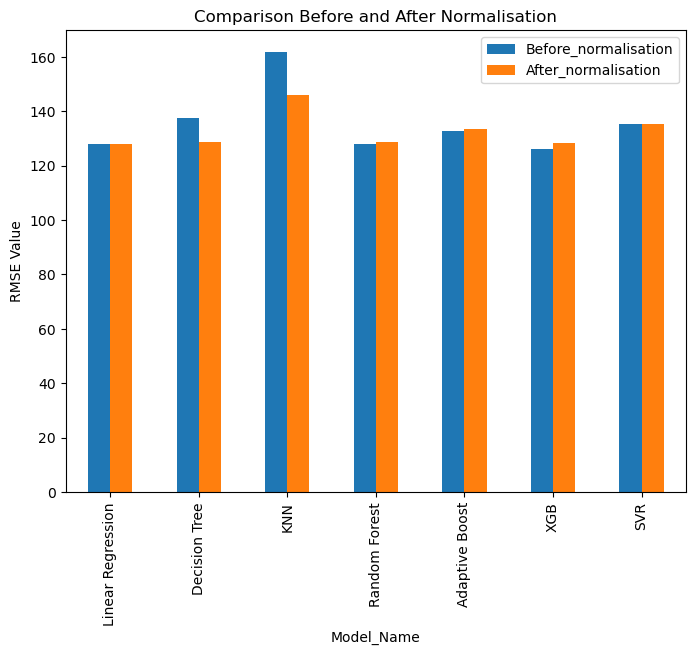

In [12]:
import matplotlib.pyplot as plt

comparison_df = before_df.merge(after_df, on='Model_Name')

# Set the 'Name' column as the index (optional)
comparison_df.set_index('Model_Name', inplace=True)

# Plot the bar graph
ax = comparison_df.plot(kind='bar', figsize=(8, 6))
plt.xlabel('Model_Name')
plt.ylabel('RMSE Value')
plt.title('Comparison Before and After Normalisation')
plt.show()

As per the above XGB, random forest, adaptive increased shown more performace before normalisation however the decision tree and knn showing better performance after normalisation. KNN performace reduction is expected without normalisation as it does have distance calculations and the features with huge numbers in it will dominate this calculations and will lead to the prediction errors 

# PART B  Running Models On Restricted Data Set

Since we found out that the XGB is performing better on the non normalized data set  I'm going to do the analysis of each of these models on the non normalised data here

In [13]:
best_rmse_restricted = 0

In [ ]:
from sklearn.model_selection import RandomizedSearchCV



for model_name, (model, param_grid) in final_models.items():

    grid_search = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=10, cv=inner_cv, scoring=rmse_scorer)
    grid_search.fit(X_normalized, data_Y)
    rmse_scores = cross_val_score(grid_search, X_normalized_restricted, data_Y_restricted, cv=outer_cv, scoring=rmse_scorer)
    
    
    mean_rmse = np.sqrt(abs(rmse_scores.mean()) ) # Take absolute RMSE
    print('----------')
    print(rmse_scores)
    print('best params are', grid_search.best_params_)
    print('model', model_name)
    print('rmsse is', mean_rmse)

    if mean_rmse < best_rmse_restricted:
        best_rmse_restricted = mean_rmse
        best_model = model_name
        best_params = grid_search.best_params_

print(f'Best model: {best_model} with RMSE of {best_rmse:.2f}')
print(f'Best hyperparameters: {best_params}')

# Model Results

----------
[-35879.70990337 -21588.72969531 -22065.8624788  -25176.44064685
 -33367.72660049]
 
best params are {'normalize': True, 'fit_intercept': True}

model Linear Regression

rmse is 166.17970352892772

----------
[-43425.93675351 -20399.478716   -26244.68168924 -34474.65738294
 -38660.83027114]
 
best params are {'min_samples_split': 10, 'max_depth': 5, 'criterion': 'mse'}

model Decision Tree

rmse is 180.66852786958617

----------
[-48876.35106213 -27269.73882552 -22840.84122194 -29964.98271836
 -40297.05228101]
 
best params are {'weights': 'uniform', 'p': 2, 'n_neighbors': 10}
model KNN

rmse is 183.98313298177663

----------
[-33317.97502581 -26488.58160842 -22310.84597683 -24415.85160877
 -29956.5624365 ]
 
best params are {'n_estimators': 150, 'min_samples_split': 5, 'max_depth': 10}
model Random Forest

rmse is 165.22095306366984

----------
[-37622.05913955 -20546.58320673 -19887.6421234  -25169.95571544
 -30437.07785506]
 
best params are {'n_estimators': 150, 'learning_rate': 0.01}

model Adaptive Boost

rmse is 163.50126485148917

----------
[-34797.05768301 -21652.19332854 -26932.51655038 -23325.41530928
 -26568.55269187]
 
best params are {'n_estimators': 200, 'max_depth': 4, 'learning_rate': 0.03}

model XGB

rmse is 163.26404108870952

----------

[-47478.23586135 -27668.5748619  -21766.44457918 -25343.700651
 -38142.36729241]
 
best params are {'kernel': 'linear', 'epsilon': 0.3, 'C': 10}

model SVR

rmse is 165.289765

--------
Best model: XGB with RMSE of 128.01
Best hyperparameters: {'n_estimators': 200, 'max_depth': 4, 'learning_rate': 0.03}

Models with Purchase = 0 is performing better with about 30-50 less RMSE value. This is possibly because the model is able to find people who are not purchasing easier with the patterns in the data. on the other hand when we don't have the purchase = 0 the models would have to predict only the people who have spend, so the accuracy reduces as there are not anymore anybody who is spending anything.The model is able to predict the non spenders accurately is what we could understand from this analysis. The best model is still found to be XGB with hyper paramteres {'n_estimators': 200, 'max_depth': 4, 'learning_rate': 0.03}, showing an rmse of 163.26404108870952.

part a insights

Top 5 Models are
1. XGB found to be the best model with hyper parameters with rmse of about 126
2. Average RMSE across 5 folds: 163.50126485148917 for ANN
3. Decision Tree has an RMSE of 128.01
4. Adaptive boost is reflecting a performance of 128.22
5. Random Forest is showing performace of 128.58 RMSE

part b insights

Top 5 models are

1. XGB found to be the best model with hyper parameters with rmse of about 163.26404108870952
2. Adaptive Boost performace is  RMSE of 163.50126485148917
3. Random Forest is showing performace of  165.22095306366984 RMSE
4. SVR is found to be the best 4th model with an RMSE of 165.289765
5. Linear regression has a performace of 166.17970352892772 (RMSE value)

Here the performances are dropped consistently in the part 2 when we restricted the data set. Model is able to comprehend better when it has non spenders as well and able to accurately predict the values. features contributing to the prediction of non spenders could be showing stronger trends compared to others as well here.

Here is a paraphrased version:

Eliminating non-spenders from the training data can undermine model performance and introduce bias in several ways:

- With a smaller dataset, the model has less examples to learn from. This can increase overfitting, where the model fits too closely to the limited data.

- Removing non-spenders may systematically change the data distribution if non-spenders differ from spenders. The model becomes specialized to spender characteristics, hurting generalizability.

- Even though non-spenders don't spend, their data may contain useful predictive features. Excluding these can remove informative signals, degrading predictions. 

- Some algorithms are sensitive to changes in data distribution. Altering the balance of spenders and non-spenders may disrupt the model's logic and behavior.

In summary, reducing sample size, introducing bias, losing feature information, and disrupting data distributions can all downgrade model performance when excluding non-spenders. Their inclusion provides important learning signals despite zero spending.
